### classification
=> sloving the classification problem

In [1]:
import pandas as pd

In [2]:
adult_data = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/adult.data.txt")

In [3]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
39                32560 non-null int64
 State-gov        32560 non-null object
 77516            32560 non-null int64
 Bachelors        32560 non-null object
 13               32560 non-null int64
 Never-married    32560 non-null object
 Adm-clerical     32560 non-null object
 Not-in-family    32560 non-null object
 White            32560 non-null object
 Male             32560 non-null object
 2174             32560 non-null int64
 0                32560 non-null int64
 40               32560 non-null int64
 United-States    32560 non-null object
 <=50K            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']

adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)
adult_data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
stri = adult_data.select_dtypes(include= ("object"))
    

In [8]:
stri.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Salary'],
      dtype='object')

In [16]:
label_encoders = {}
for col in stri.columns:
    le = LabelEncoder()
    label_encoders[col] = le.fit(stri[col])
    
    adult_data[col+'en'] = le.transform(stri[col])

In [14]:
print(label_encoders)

{'workclass': LabelEncoder(), 'education': LabelEncoder(), 'marital-status': LabelEncoder(), 'occupation': LabelEncoder(), 'relationship': LabelEncoder(), 'race': LabelEncoder(), 'sex': LabelEncoder(), 'native-country': LabelEncoder(), 'Salary': LabelEncoder()}


### Unsupervised learning

In [ ]:
### Excercise
1. find the  similar 3 categories



In [17]:
hr_data = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt")

In [18]:
hr_data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14401,0.09,0.80,7,283,5,0,1,0,technical,low
5281,0.68,0.68,3,143,3,0,0,0,sales,medium
10659,0.92,0.68,5,177,4,0,0,0,support,medium
7648,0.53,0.87,5,158,3,0,0,0,sales,medium
7780,0.31,0.59,4,138,2,0,0,0,RandD,low
14158,0.85,0.90,3,245,3,0,0,0,marketing,medium
8420,0.84,0.55,4,270,3,1,0,0,sales,medium
10062,0.82,0.89,5,182,3,0,0,0,IT,low
13723,0.59,0.92,3,203,10,0,0,0,support,medium
13342,0.19,0.97,6,269,6,0,0,0,hr,medium


In [22]:
hr_data.rename(columns = {"sales":"Dept"}, inplace = True)

In [23]:
hr_data_cat =  hr_data.select_dtypes(include = ["object"])

In [26]:
labels_en ={}
for col  in hr_data_cat:
    le = LabelEncoder()
    labels_en[col] = le.fit(hr_data_cat[col])
    hr_data_cat[col+"num"] = le.transform(hr_data_cat[col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [37]:
hr_data_num =  hr_data.select_dtypes(exclude= ["object"])

In [30]:
from sklearn.cluster import KMeans


In [36]:
cluster = KMeans(n_clusters = 4)

In [38]:
cluster.fit(hr_data_num)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
labels = cluster.predict(hr_data_num)

In [44]:
hr_data_num[labels==3]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
3,0.72,0.87,5,223,5,0,1,0
6,0.10,0.77,6,247,4,0,1,0
8,0.89,1.00,5,224,5,0,1,0
12,0.84,0.92,4,234,5,0,1,0
25,0.89,0.92,5,242,5,0,1,0
...,...,...,...,...,...,...,...,...
14966,0.83,0.81,5,219,5,0,1,0
14970,0.78,0.93,4,225,5,0,1,0
14980,0.76,0.89,5,238,5,0,1,0
14986,0.85,0.85,4,247,6,0,1,0


In [46]:
import matplotlib.pyplot as pt
%matplotlib inline

In [59]:
hr_data_sub = hr_data_num[["time_spend_company","number_project"]]

In [ ]:
cluster= KMeans(n_clusters = 4)


In [49]:
cluster.fit(hr_data_sub)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
cluster.predict(hr_data_sub)

array([1, 1, 1, ..., 1, 1, 1])

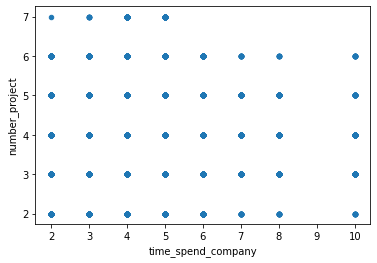

In [60]:
hr_data_sub.plot.scatter( x= "time_spend_company", y= "number_project")